<a href="https://colab.research.google.com/github/mateuszrajca69/Uczenie-maszynowe/blob/main/praca_uczenie_maszynowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [2]:
NUM_TRIALS = 16
BANDIT_PROBABILITIES = [0.75, 0.5, 0.25, 0.25]
EPSILON = 0.1

In [3]:
class Bandit:
  def __init__(self, q):
    self.q = q
    self.q_estimate = 0.
    self.N = 0.

  def pull(self):
    return np.random.random() < self.q

  def update(self, r):
    self.N += 1.
    self.q_estimate = ((self.N - 1)*self.q_estimate + r) / self.N

średnie oszacowanie: 0.8125
średnie oszacowanie: 0.0
średnie oszacowanie: 0.0
średnie oszacowanie: 0.0
całkowita zdobyta nagroda: 13.0
ogólny wskaźnik wygranych: 0.8125
tyle razy wybrano każdego bandytę: [16.0, 0.0, 0.0, 0.0]


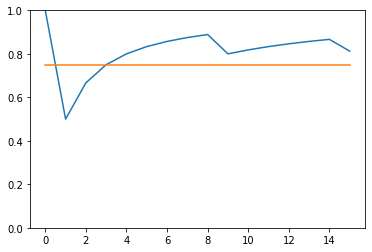

In [4]:
def experiment_greedy():
  bandits = [Bandit(q) for q in BANDIT_PROBABILITIES]
  rewards = np.zeros(NUM_TRIALS)

  for i in range(NUM_TRIALS):
    j = np.argmax([b.q_estimate for b in bandits])

    r = bandits[j].pull()

    rewards[i] = r

    bandits[j].update(r)


  for b in bandits:
    print("średnie oszacowanie:", b.q_estimate)

  print("całkowita zdobyta nagroda:", rewards.sum())
  print("ogólny wskaźnik wygranych:", rewards.sum() / NUM_TRIALS)
  print("tyle razy wybrano każdego bandytę:", [b.N for b in bandits])

  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.ylim([0, 1])
  plt.plot(win_rates)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()

if __name__ == "__main__":
  experiment_greedy()